In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/MyDrive/Colab\ Notebooks/Math/dataset_new

/content/gdrive/MyDrive/Colab Notebooks/Math/dataset_new


**Dataset Prep**

In [25]:
data_dir = '/content/gdrive/MyDrive/Colab Notebooks/Math/dataset_new/train'
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode='categorical',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2467 files belonging to 4 classes.
Using 1974 files for training.


In [26]:
data_dir = '/content/gdrive/MyDrive/Colab Notebooks/Math/dataset_new/test'
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode='categorical',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 433 files belonging to 4 classes.
Using 86 files for validation.


In [27]:
class_names = train_ds.class_names
print(class_names)

['Closed', 'Open', 'no_yawn', 'yawn']


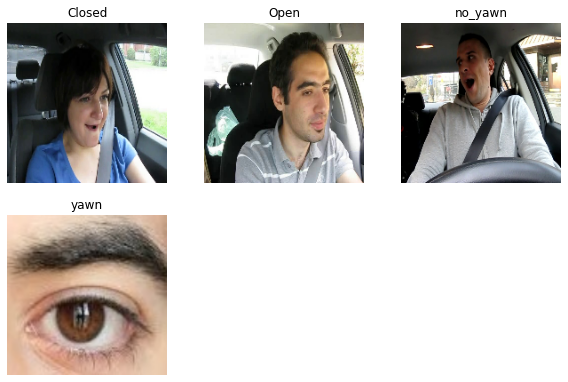

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

# Resnet

In [30]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))

In [31]:
resnet_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               1049088   
                                                                 
 dense_9 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
_________________________________________________________________


In [32]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
62/62 [==============================] - 307s 5s/step - loss: 0.5646 - accuracy: 0.8288 - val_loss: 0.2408 - val_accuracy: 0.8953
Epoch 2/10
62/62 [==============================] - 220s 4s/step - loss: 0.1394 - accuracy: 0.9402 - val_loss: 0.2373 - val_accuracy: 0.9070
Epoch 3/10
62/62 [==============================] - 220s 4s/step - loss: 0.1189 - accuracy: 0.9519 - val_loss: 0.1468 - val_accuracy: 0.9419
Epoch 4/10
62/62 [==============================] - 220s 4s/step - loss: 0.0644 - accuracy: 0.9742 - val_loss: 0.1864 - val_accuracy: 0.9419
Epoch 5/10
62/62 [==============================] - 220s 4s/step - loss: 0.0675 - accuracy: 0.9737 - val_loss: 0.1479 - val_accuracy: 0.9419
Epoch 6/10
62/62 [==============================] - 220s 4s/step - loss: 0.0549 - accuracy: 0.9807 - val_loss: 0.1560 - val_accuracy: 0.9535
Epoch 7/10
62/62 [==============================] - 220s 4s/step - loss: 0.1036 - accuracy: 0.9564 - val_loss: 0.1785 - val_accuracy: 0.9535
Epoch 8/10
62

In [34]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

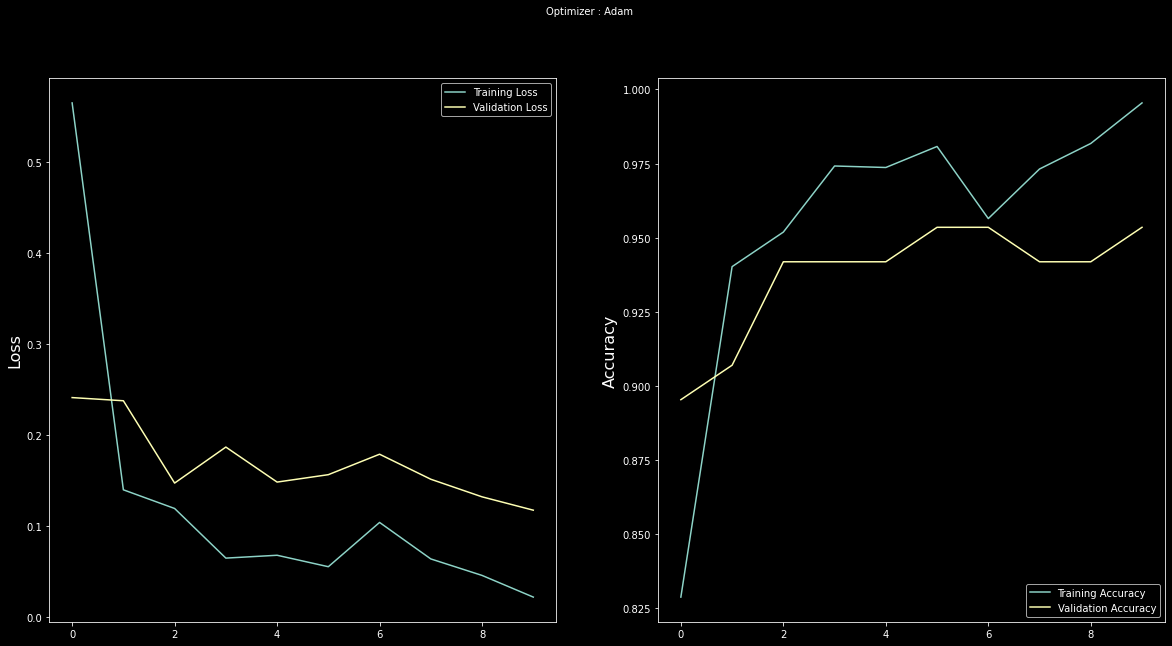

In [35]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [36]:
resnet_model.save('/home/Resnet.h5')